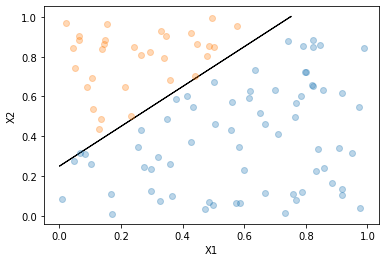

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()

# Funções de Custo

In [2]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


# Perceptron

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.014
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

148.86895392361276
229.981551322304
113.56551335900637
230.3871754099728
87.97095465983148
246.8049521268473
67.53426679237178
278.9451452833448
50.64393333860037
329.9988866967886
38.32639867019653
407.03243005928255
34.85881143728506
522.4154376340284
49.46378160123652
696.6259810185672
99.58108178259008
963.1624949037246
216.6735391562108
1376.8776852605522
[-1.56290479  0.55057364 -2.63651155]
0.31


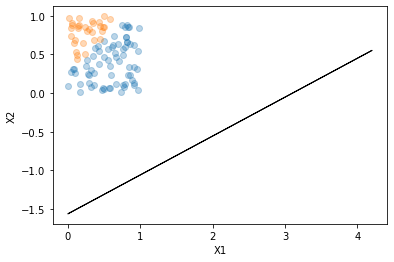

In [4]:
plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])

In [5]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[-0.15583466,  0.21435891,  0.35094373],
        [ 0.19502008,  0.57198495,  0.24973509],
        [-0.11750613,  0.56278582, -0.17402387],
        [ 0.3186554 ,  0.91391918, -0.16142749],
        [-0.1054162 ,  0.804535  , -0.58655232],
        [ 0.44497823,  1.17729348, -0.4608076 ],
        [-0.120999  ,  0.9636342 , -0.91787061],
        [ 0.58056783,  1.38681325, -0.67129924],
        [-0.16734099,  1.05687779, -1.19262962],
        [ 0.73288741,  1.56212099, -0.80883947],
        [-0.2494186 ,  1.09532956, -1.43088333],
        [ 0.91077493,  1.71945216, -0.88374831],
        [-0.37446505,  1.08534899, -1.64967806],
        [ 1.12503009,  1.87298543, -0.90161636],
        [-0.55249152,  1.02923144, -1.86437858],
        [ 1.38913822,  2.03599739, -0.86381844],
        [-0.79699829,  0.92552122, -2.08983705],
        [ 1.72018121,  2.22191444, -0.76770096],
        [-1.12592488,  0.76903049, -2.34149631],
        [ 2.13999828,  2.44534408, -0.60646533]]),
 array([ 148.86895

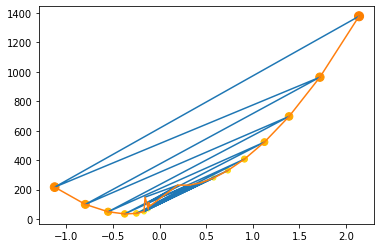

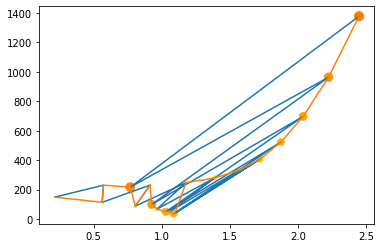

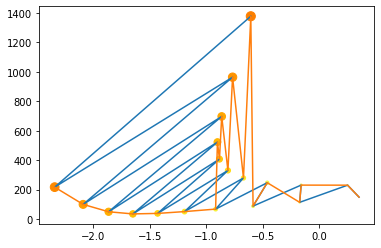

In [6]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='Wistia')
    idx = np.argsort(whist[:,i])
    plt.plot(whist[idx,i], chist[idx])
    plt.show()

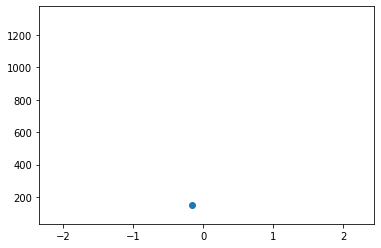

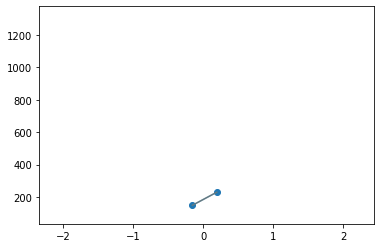

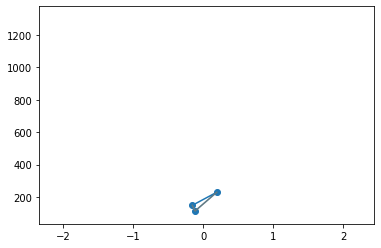

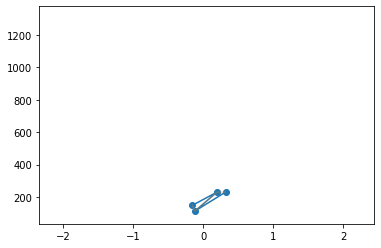

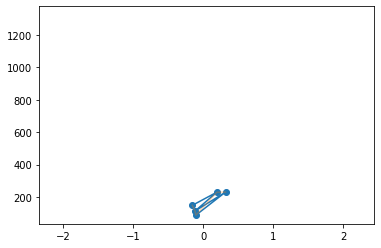

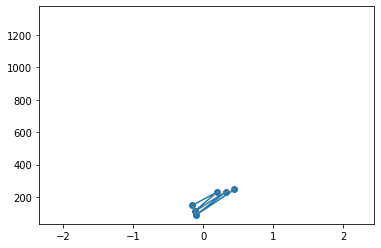

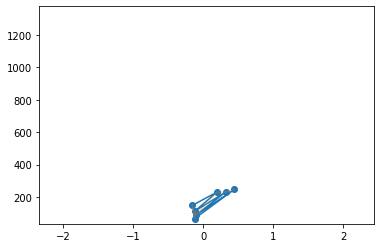

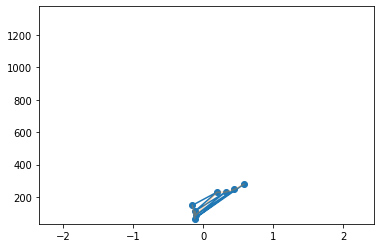

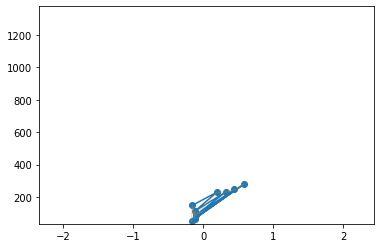

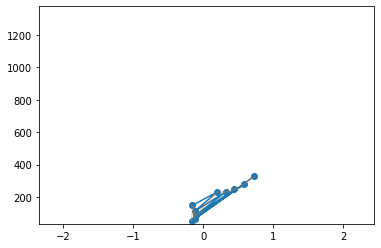

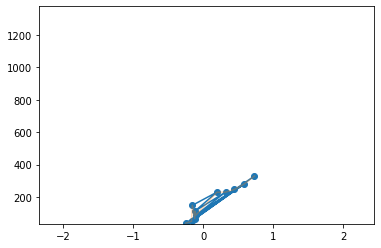

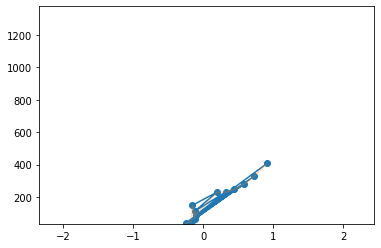

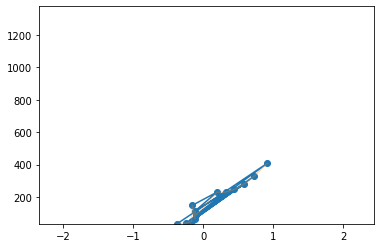

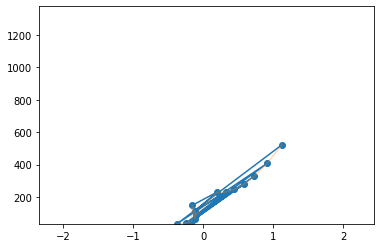

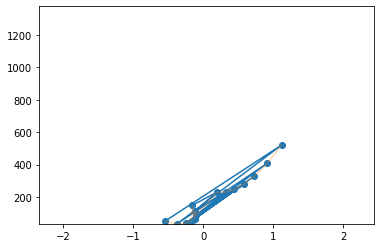

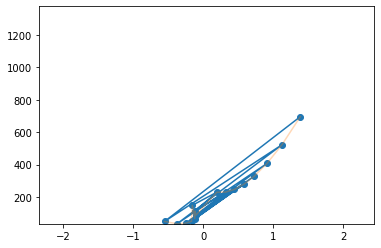

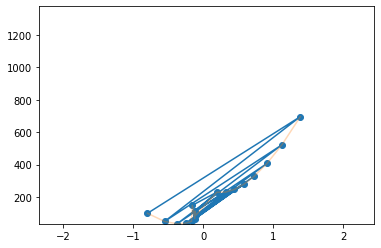

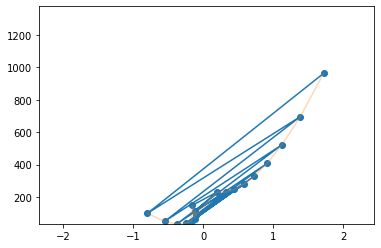

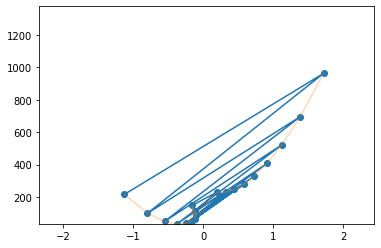

In [7]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.xlim([np.min(whist), np.max(whist)])
        plt.ylim([np.min(chist), np.max(chist)])
        plt.show()